In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

In [224]:
# load df
df = pd.read_csv('/content/drive/MyDrive/Data Science and Analytics/Projects /Bluechip Hackathon/Train.csv', index_col=0)
df.head()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
ID,,,,,,,,,,,,,,
74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65288,LP002560,0,1,0,0,0,1297,3293.124489,17,373,1,1,1,3750
86963,LP002585,1,1,0,0,0,7358,0.000000,17,365,1,2,1,3547
69407,LP002175,1,1,2,0,0,150,0.000000,170,353,1,1,1,3750


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5898 entries, 74768 to 84112
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            5898 non-null   object 
 1   Gender             5898 non-null   int64  
 2   Married            5898 non-null   int64  
 3   Dependents         5898 non-null   object 
 4   Education          5898 non-null   int64  
 5   Self_Employed      5898 non-null   int64  
 6   ApplicantIncome    5898 non-null   int64  
 7   CoapplicantIncome  5898 non-null   float64
 8   LoanAmount         5898 non-null   int64  
 9   Loan_Amount_Term   5898 non-null   int64  
 10  Credit_History     5898 non-null   int64  
 11  Property_Area      5898 non-null   int64  
 12  Loan_Status        5898 non-null   int64  
 13  Total_Income       5898 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 691.2+ KB


In [226]:
# checking number of unique values in columns with 'object' data type
df.Dependents.nunique(), df.Loan_ID.nunique()

(4, 457)

In [227]:
# check for null values
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [228]:
# check for duplicated entries
df.duplicated().sum()

0

In [229]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,0.910817,0.854527,0.120210,0.107664,7782.026958,1245.954548,97.410478,359.114954,0.920482,1.183961,0.832994,5239.284503
std,0.285032,0.352607,0.325235,0.309981,9182.571831,2368.012349,103.483478,48.876088,0.270569,0.730568,0.373013,2308.679455
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,1963.000000
25%,1.000000,1.000000,0.000000,0.000000,2342.250000,0.000000,17.000000,357.000000,1.000000,1.000000,1.000000,3750.000000
50%,1.000000,1.000000,0.000000,0.000000,6989.000000,117.562275,42.000000,368.000000,1.000000,1.000000,1.000000,6000.000000
75%,1.000000,1.000000,0.000000,0.000000,8375.000000,1680.894542,174.000000,372.000000,1.000000,2.000000,1.000000,6000.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,1.000000,22500.000000


In [230]:
# define x and y
x = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

In [231]:
# split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [232]:
# check for imbalance
Counter(y_train)

Counter({0: 798, 1: 3920})

### DATA PREPROCESSING

__CATEGORICAL ENCODING__

In [233]:
encoder = OneHotEncoder()

In [234]:
#encoding the 'Dependents' Column
Dependents = encoder.fit_transform(x_train[['Dependents']]).toarray()
cat_names = encoder.get_feature_names_out(['Dependents'])
x_train[cat_names] = Dependents

In [235]:
x_train.drop(columns=['Dependents'], inplace= True)

In [236]:
x_train.head(3)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
ID,,,,,,,,,,,,,,,
78343,1,1,0,0,5348,4047.861916,17,373,1,0,5787,0.0,1.0,0.0,0.0
64862,1,1,0,0,2392,0.000000,17,353,1,1,6000,1.0,0.0,0.0,0.0
19445,1,1,1,0,15180,0.000000,17,329,1,2,6256,1.0,0.0,0.0,0.0


__FEATURE SCALING__

In [240]:
cols_to_scale= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']

In [241]:
scaler= StandardScaler()
x_train[cols_to_scale]= scaler.fit_transform(x_train[cols_to_scale])

In [242]:
x_train.head(3)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
ID,,,,,,,,,,,,,,,
78343,1,1,0,0,-0.262935,1.161739,-0.780655,0.286401,1,0,0.235365,0.0,1.0,0.0,0.0
64862,1,1,0,0,-0.576381,-0.525098,-0.780655,-0.139475,1,1,0.326610,1.0,0.0,0.0,0.0
19445,1,1,1,0,0.779622,-0.525098,-0.780655,-0.650525,1,2,0.436276,1.0,0.0,0.0,0.0


__MODEL TRAINING__

In [202]:
log_reg= LogisticRegression()
xgb= XGBClassifier()
rf= RandomForestClassifier()
svc= SVC()

In [243]:
# Count occurrences of each class
class_counts = Counter(y_train)
total_samples = len(y_train)

# Compute class weights
class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}
print("Class Weights:", class_weights)

Class Weights: {0: 2.956140350877193, 1: 0.6017857142857143}


In [245]:
rf = RandomForestClassifier(class_weight=class_weights, max_depth= 7, min_samples_split= 2, n_estimators= 200)

In [246]:
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 2.956140350877193,
                                     1: 0.6017857142857143},
                       max_depth=7, n_estimators=200)

__MODEL EVALUATION__

In [247]:
# encode 'Dependents'column of test dataset
Dependents = encoder.fit_transform(x_test[['Dependents']]).toarray()
cat_names = encoder.get_feature_names_out(['Dependents'])
x_test[cat_names] = Dependents

In [248]:
x_test.drop(columns=['Dependents'], inplace= True)

In [249]:
#scale test dataset
x_test[cols_to_scale]= scaler.fit_transform(x_test[cols_to_scale])

In [250]:
pred_y = rf.predict(x_test)
classification = classification_report(y_test, pred_y)
print(classification)

              precision    recall  f1-score   support

           0       0.15      0.05      0.07       187
           1       0.84      0.95      0.89       993

    accuracy                           0.81      1180
   macro avg       0.50      0.50      0.48      1180
weighted avg       0.73      0.81      0.76      1180



In [251]:
confusion_matrix(y_test, pred_y)

array([[  9, 178],
       [ 51, 942]])

__FEATURE IMPORTANCE__

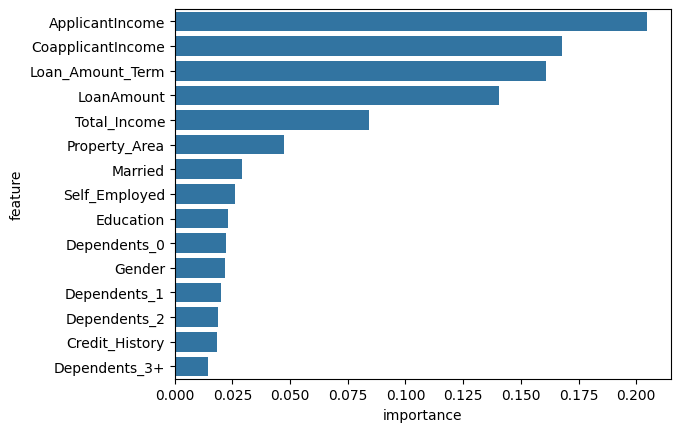

In [253]:
feature_importances = pd.DataFrame({'feature': list(x_train.columns), 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)
feature_importances
sns.barplot(data=feature_importances, x='importance', y='feature')
plt.show()

In [256]:
new_x = x_train.filter(['ApplicantIncome','CoapplicantIncome' 'Loan_Amount_Term', 'LoanAmount', 'Total_Income', 'Property_Area'])
new_x.head()

,ApplicantIncome,LoanAmount,Total_Income,Property_Area
ID,,,,
78343,-0.262935,-0.780655,0.235365,0
64862,-0.576381,-0.780655,0.326610,1
19445,0.779622,-0.780655,0.436276,2
27903,-0.565989,-0.780655,-0.030660,0
53041,-0.085323,-0.780655,-0.637249,2


In [261]:
rf = RandomForestClassifier(class_weight=class_weights, max_depth= 3, min_samples_split= 2, n_estimators= 100)

In [ ]:
{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}

In [262]:
rf.fit(new_x, y_train)

RandomForestClassifier(class_weight={0: 2.956140350877193,
                                     1: 0.6017857142857143},
                       max_depth=3)

In [266]:
new_x_test = x_test.filter(['ApplicantIncome','CoapplicantIncome' 'Loan_Amount_Term', 'LoanAmount', 'Total_Income', 'Property_Area'])
pred_y = rf.predict(new_x_test)
classification = classification_report(y_test, pred_y)
print(classification)

              precision    recall  f1-score   support

           0       0.19      0.15      0.17       187
           1       0.85      0.88      0.86       993

    accuracy                           0.77      1180
   macro avg       0.52      0.52      0.52      1180
weighted avg       0.74      0.77      0.75      1180



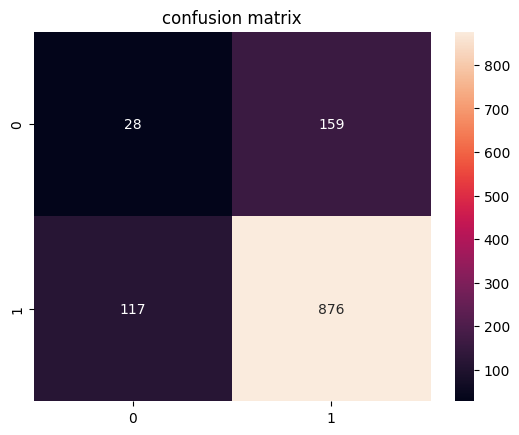

In [268]:
cm = confusion_matrix(y_test, pred_y)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('confusion matrix')
plt.show()

__TUNING__

In [211]:
from sklearn.model_selection import GridSearchCV

In [212]:
grd = GridSearchCV

In [213]:
param = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6]}

In [214]:
clf = rf

In [215]:
grd = GridSearchCV(clf, param, cv=5)

In [258]:
grd.fit(new_x, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1.5, 1: 0.75}),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200]})

In [260]:
grd.best_params_

{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}